# Necessary librarys

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np


In [73]:
# • CRIM per capita crime rate by town
# • ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# • INDUS proportion of non-retail business acres per town
# • CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# • NOX nitric oxides concentration (parts per 10 million)
# • RM average number of rooms per dwelling
# • AGE proportion of owner-occupied units built prior to 1940
# • DIS weighted distances to five Boston employment centres
# • RAD index of accessibility to radial highways
# • TAX full-value property-tax rate per $10,000
# • PTRATIO pupil-teacher ratio by town
# • B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# • LSTAT % lower status of the population
# • MEDV Median value of owner-occupied homes in $1000’s

### Load dataset

In [74]:
dataset = load_boston()

C:\Users\HP\Desktop\my_tu_verras\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

In [75]:
def load_dataframe(datas):
    df = pd.DataFrame(data=datas.data, columns=datas.feature_names)
    df['MEDV'] = dataset.target
    return df

df = load_dataframe(dataset)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [76]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Part of Data Analysis

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

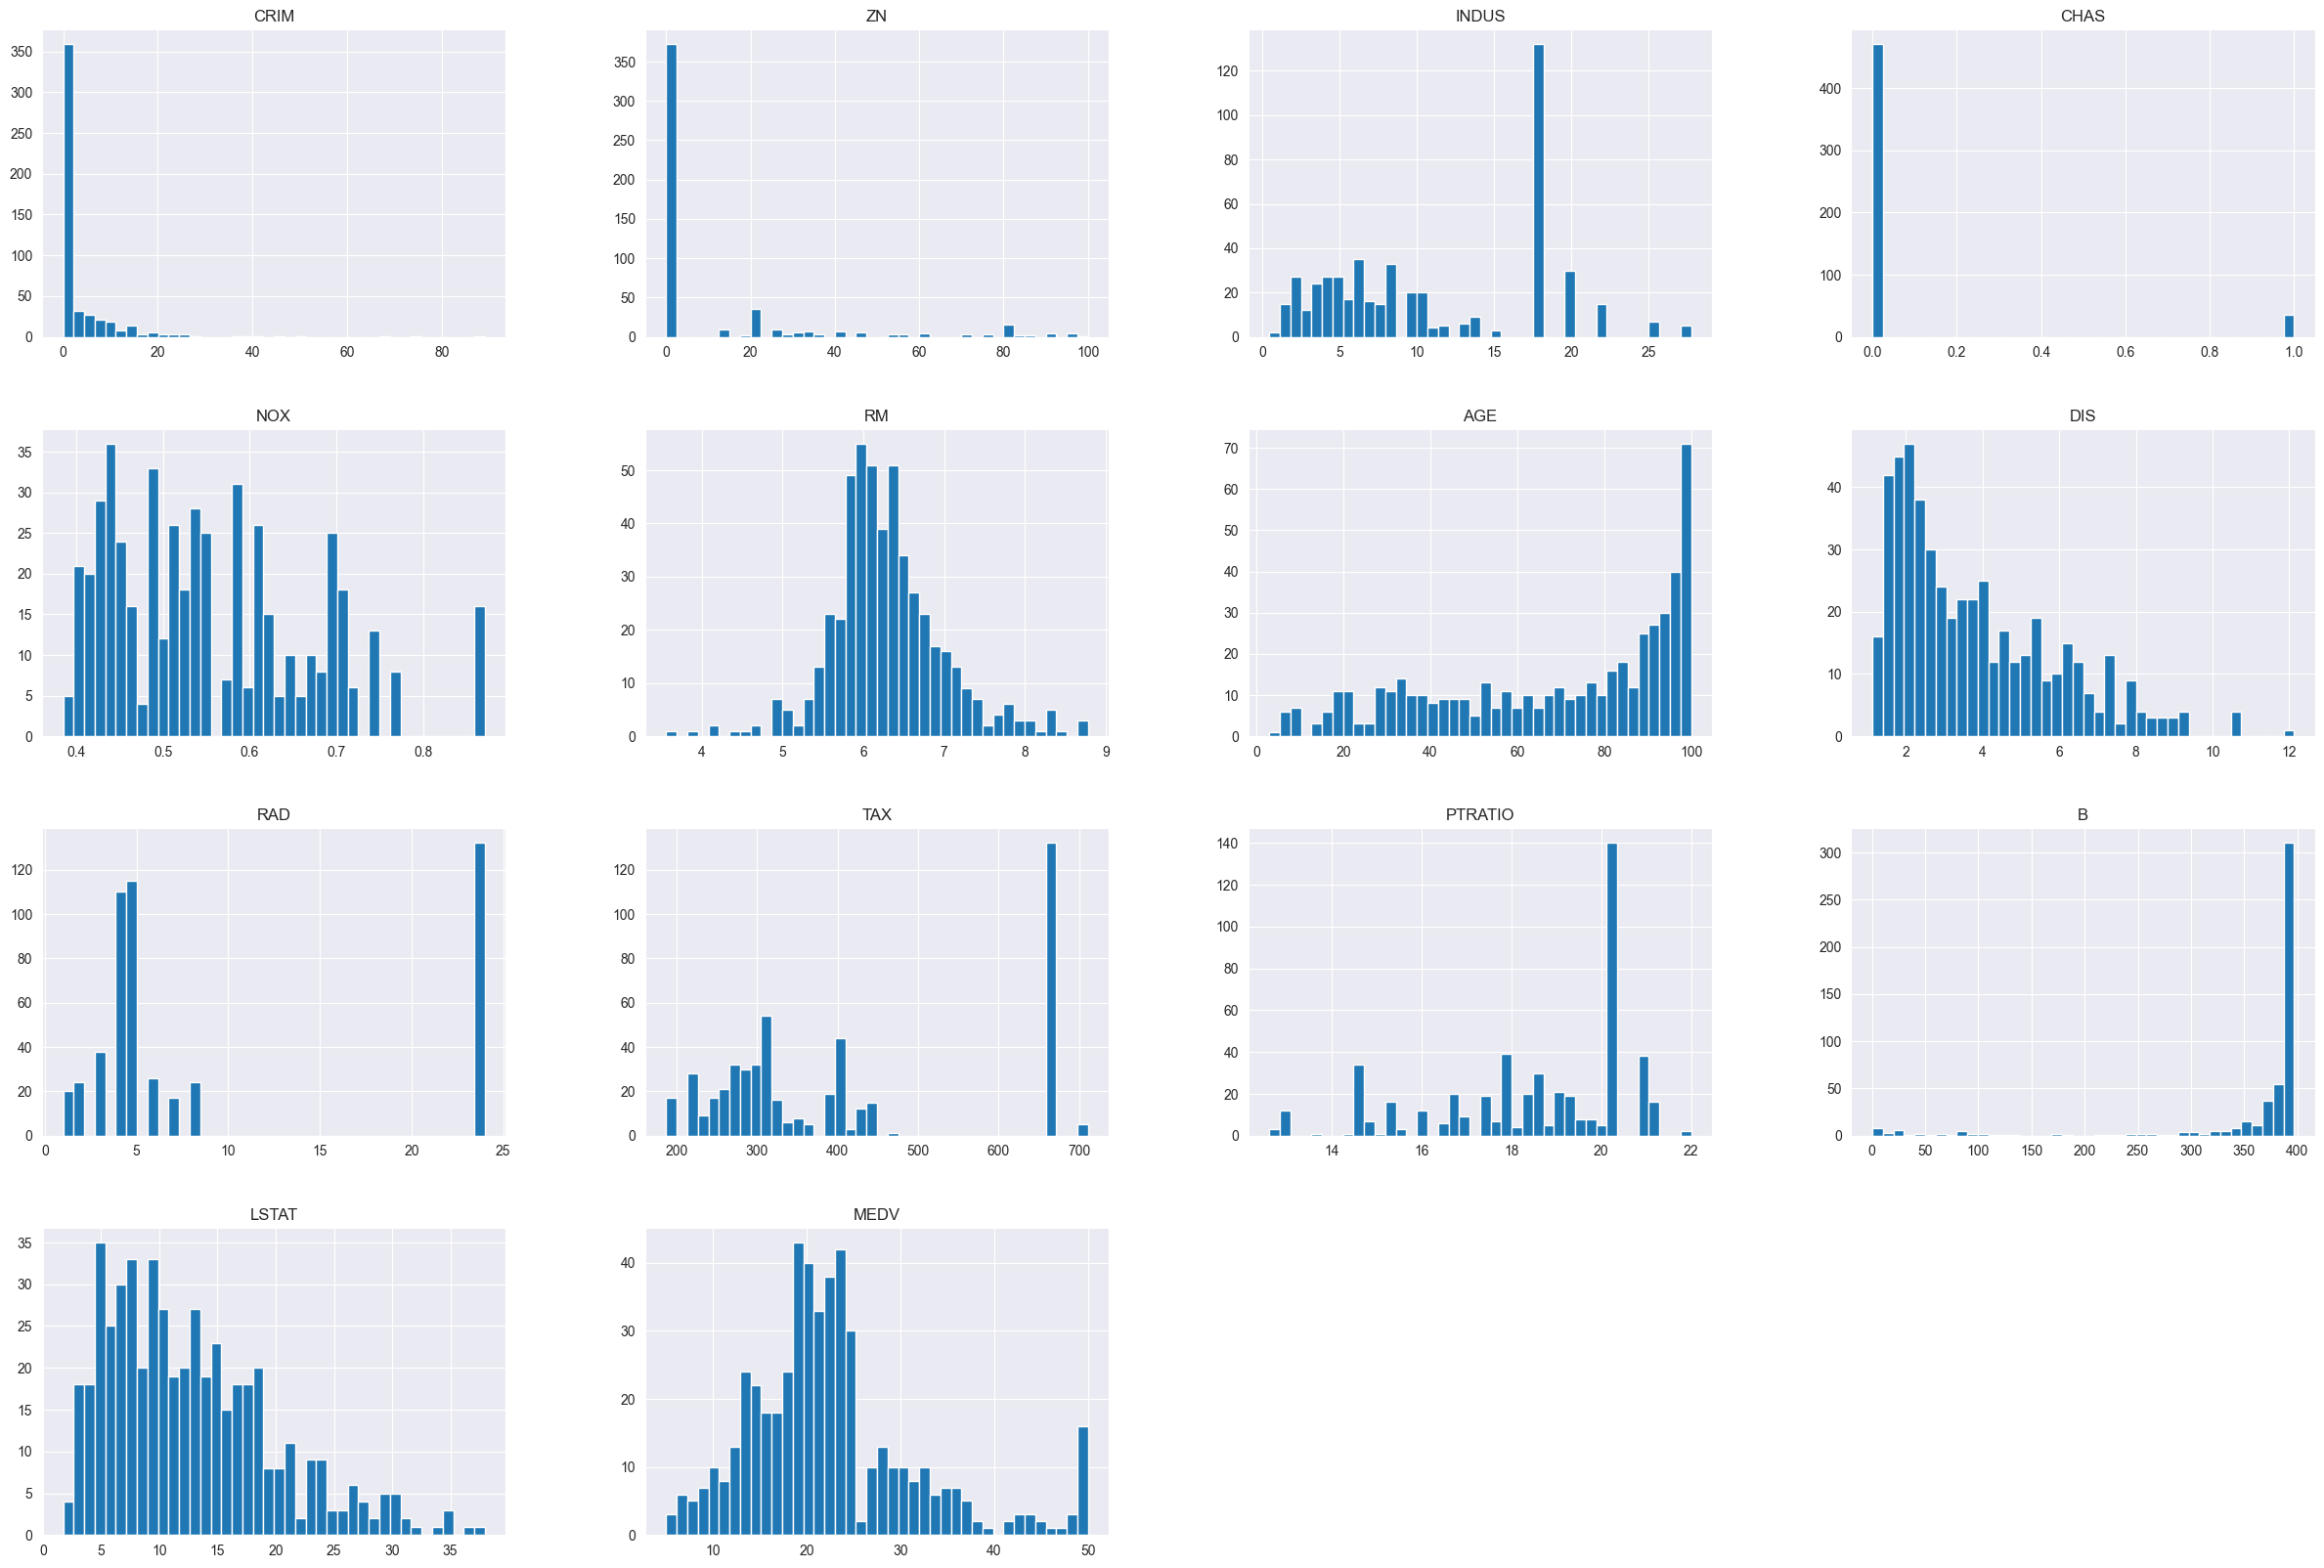

In [77]:
df.hist(bins=40, figsize=(30,20))

## Looking for correlations

In [78]:
def compute_correlations_matrix(df):
    return df.corr()
correlations = compute_correlations_matrix(df)

In [79]:
# print(correlations['ZN'])

In [80]:
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


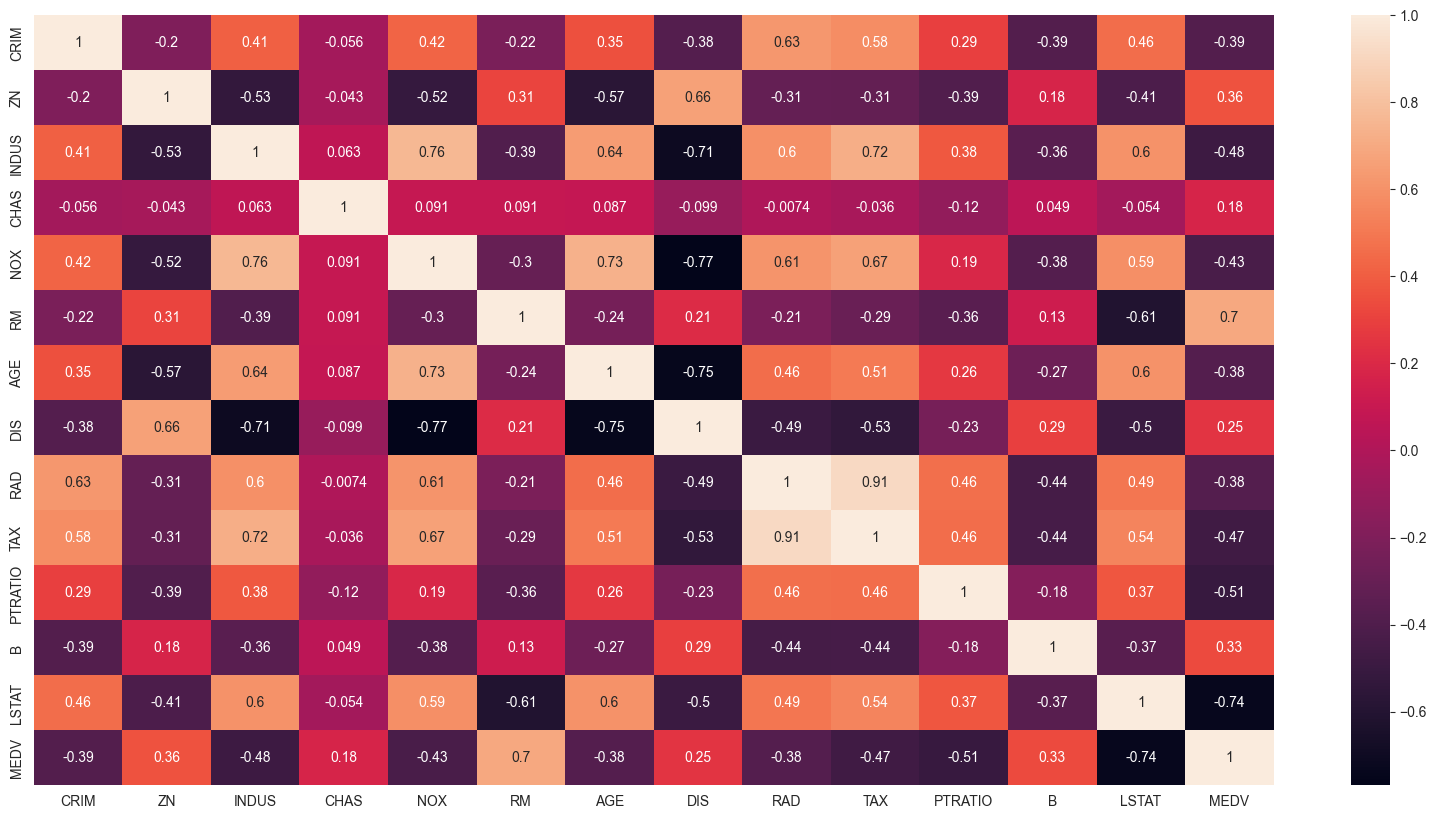

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(correlations, annot = True)
plt.show()

### → Plot every attribute against each other.

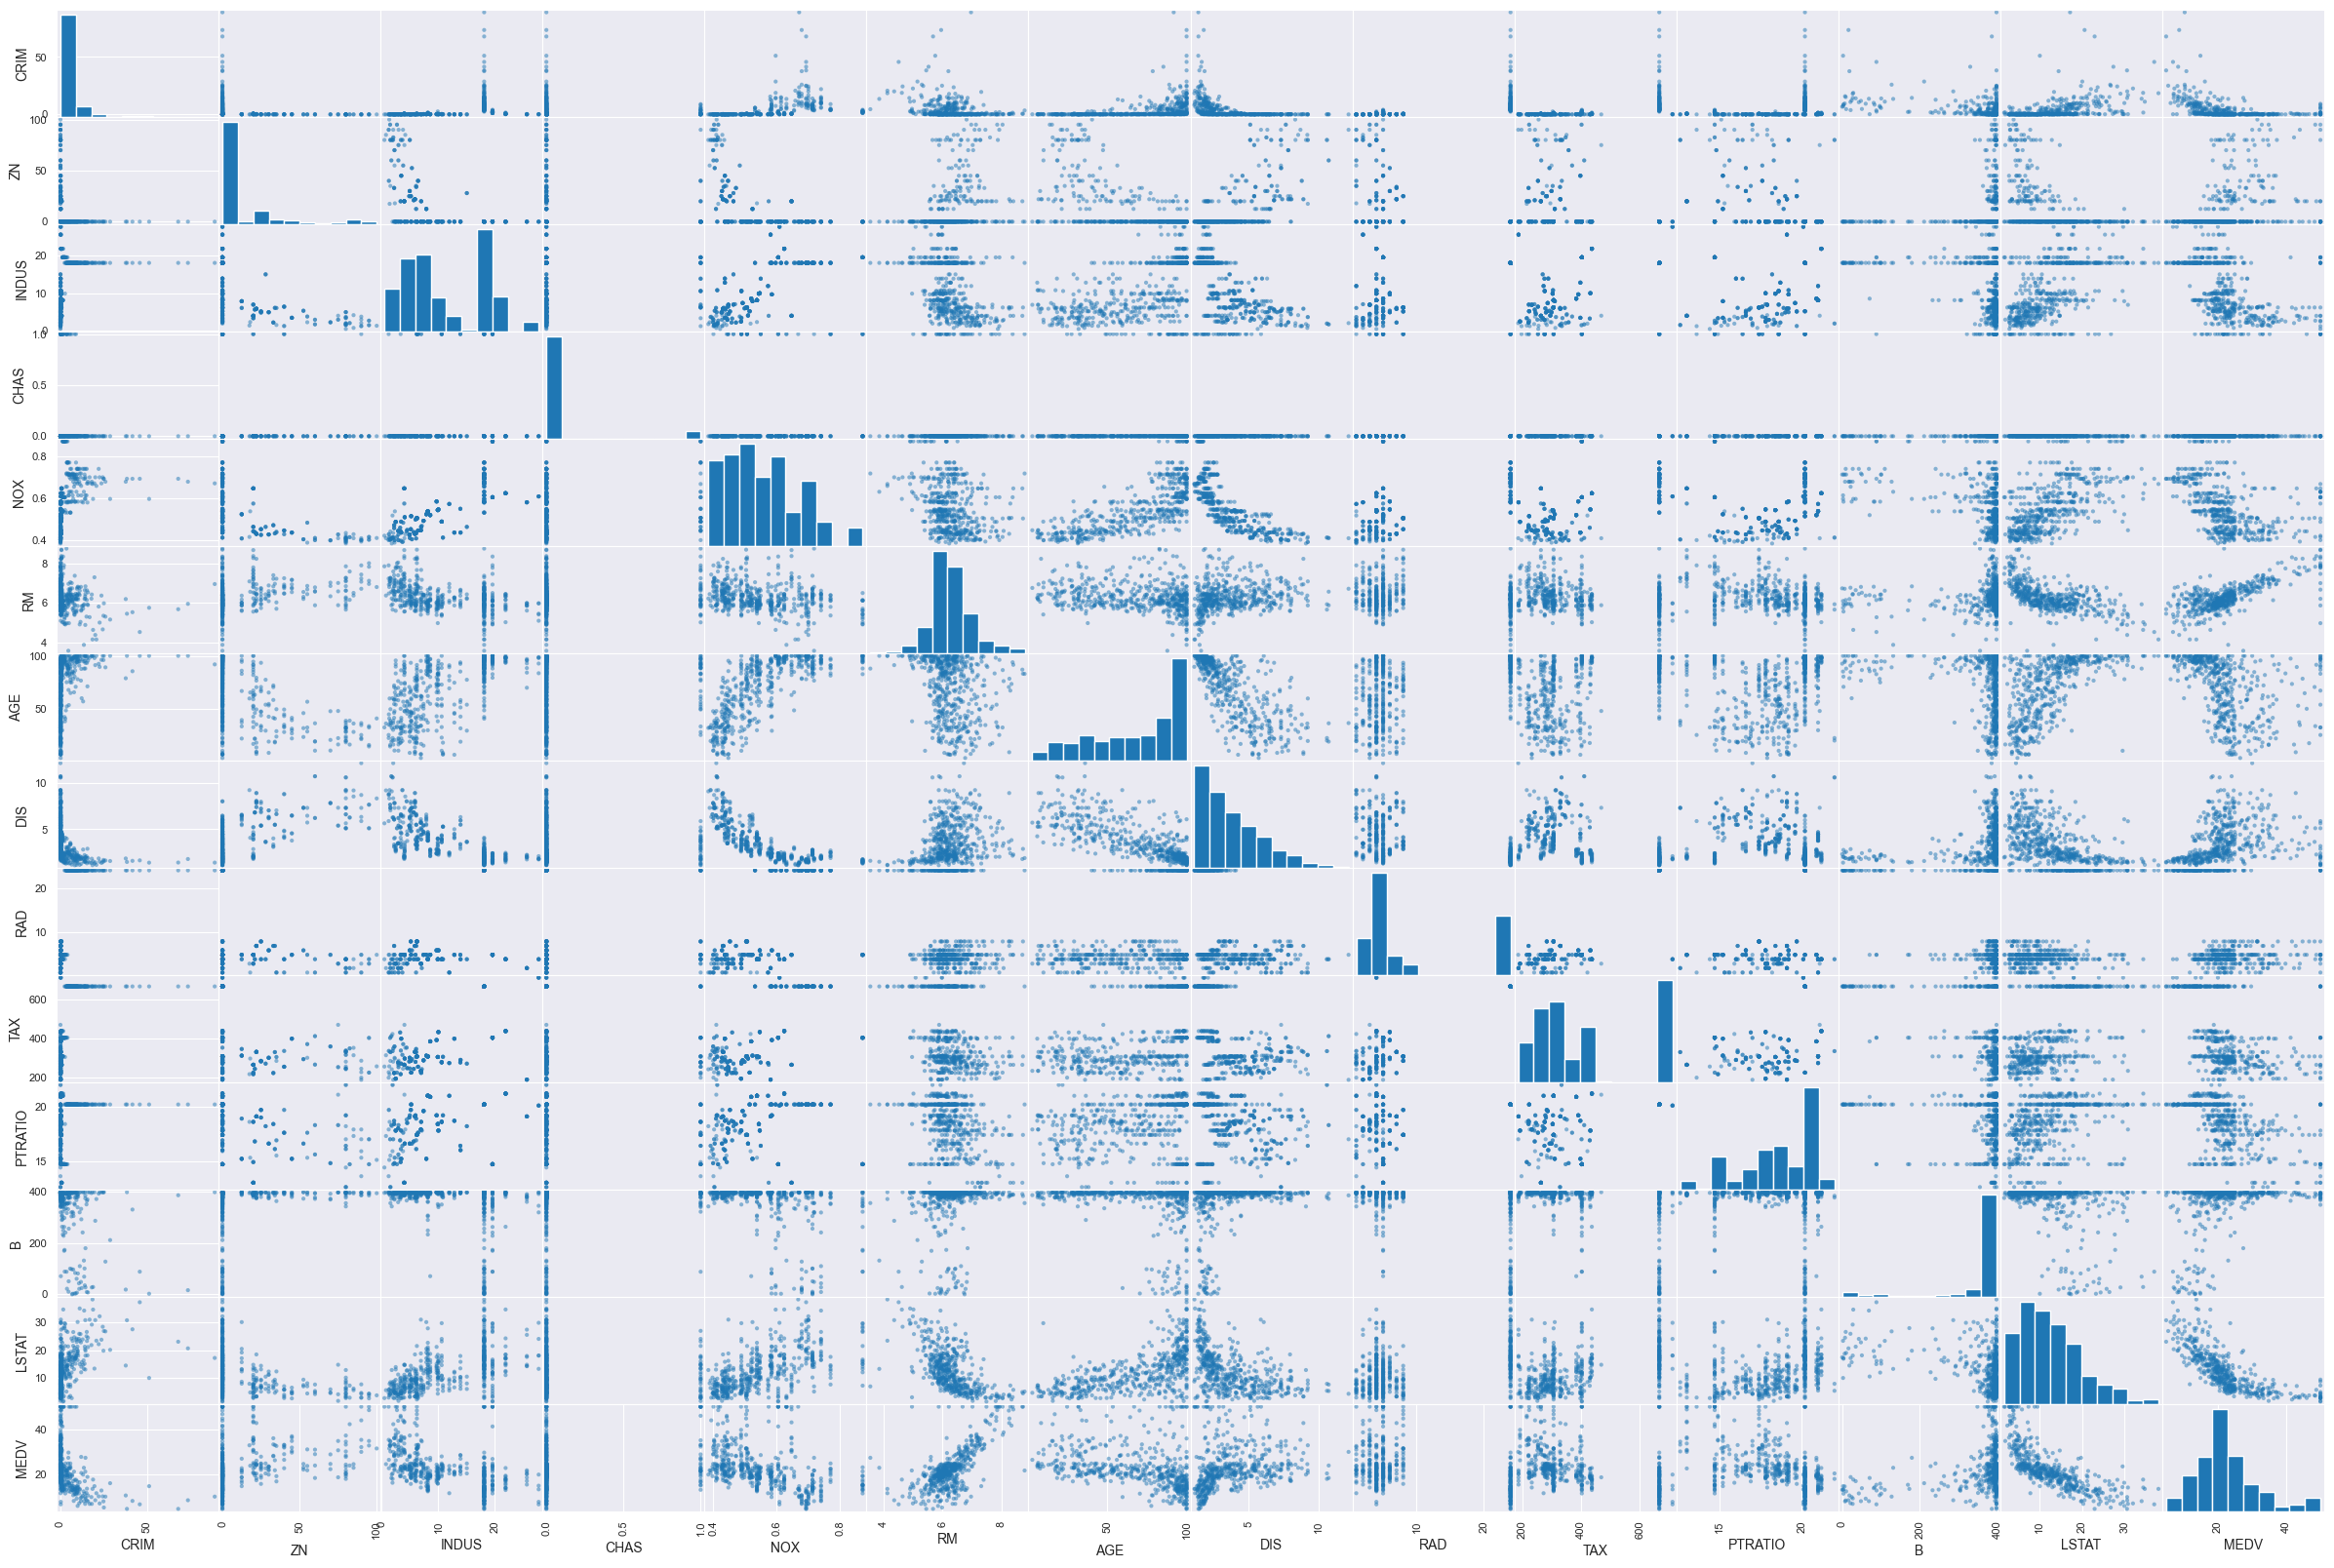

In [82]:
# Correlation Matrix Graphs (Scatter matrix)
pd.plotting.scatter_matrix(df,alpha=0.5,figsize=(30,20))
plt.show()

### → Plot MEDV in function of RM

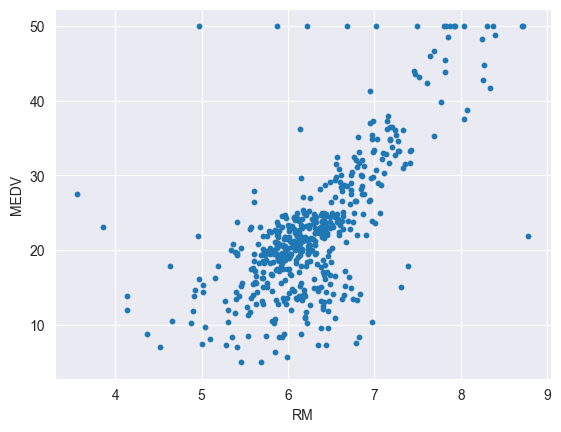

In [83]:
plt.scatter(x=df['RM'], y=df['MEDV'], s=10)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

### → Plot the correlation scatter plot of the median value against LSTAT, AGE, and CRIME.

C:\Users\HP\AppData\Local\Temp\ipykernel_12896\1134113030.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


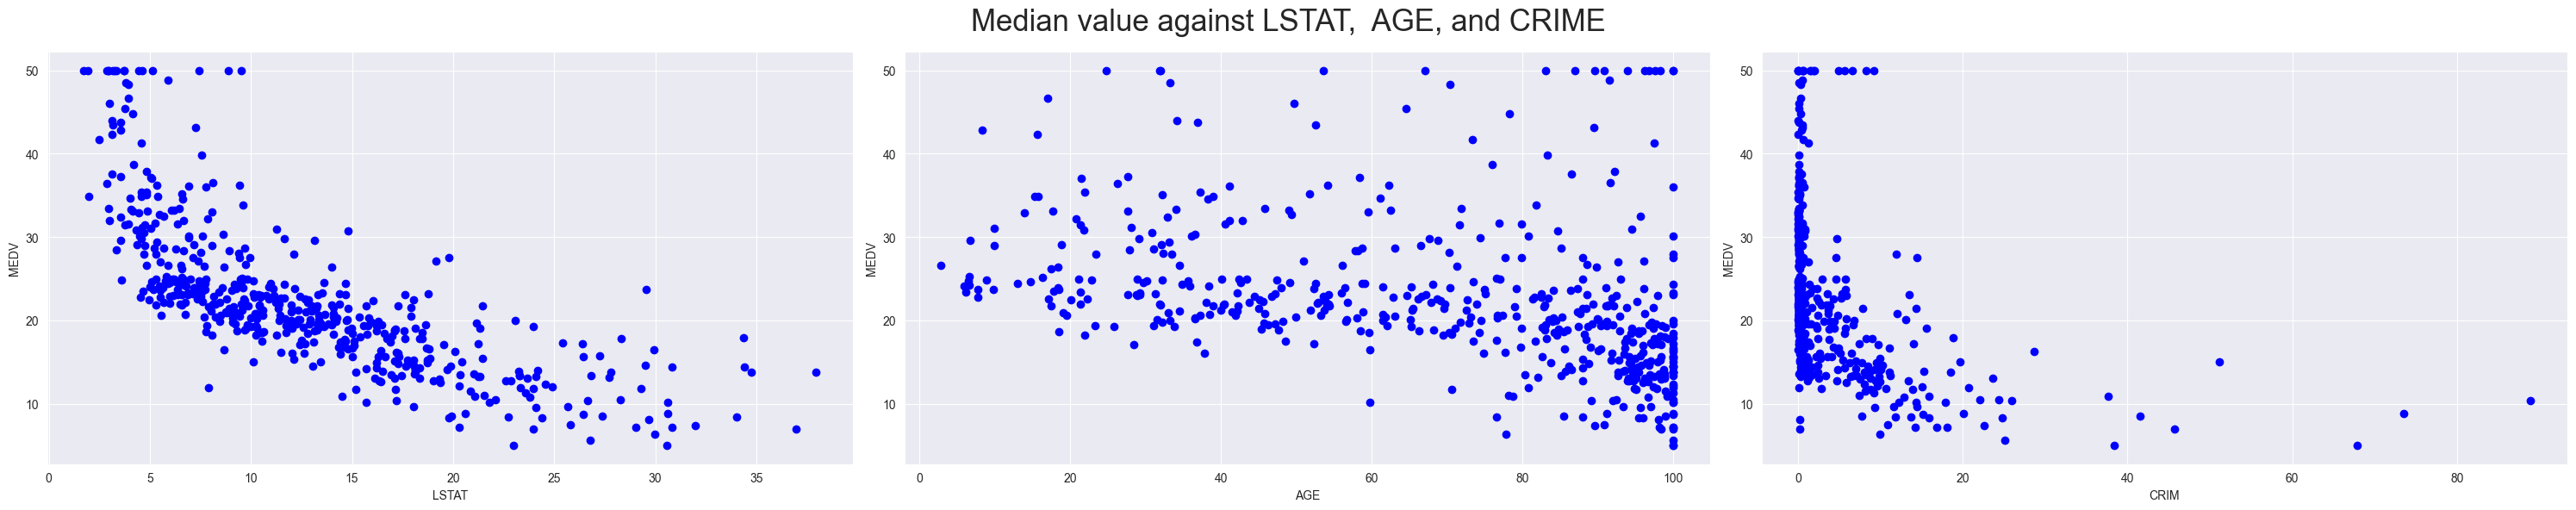

In [84]:
%matplotlib inline
fig, ax = plt.subplots(1,3, figsize=(30,6))
ax[0].scatter(df['LSTAT'],df['MEDV'],color='blue')
ax[0].set_xlabel('LSTAT')
ax[0].set_ylabel('MEDV')
ax[1].scatter(df['AGE'],df['MEDV'],color='blue')
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('MEDV')
ax[2].scatter(df['CRIM'],df['MEDV'],color='blue')
ax[2].set_xlabel('CRIM')
ax[2].set_ylabel('MEDV')
fig.suptitle('Median value against LSTAT,  AGE, and CRIME',fontsize=25)

fig.tight_layout()
fig.show()

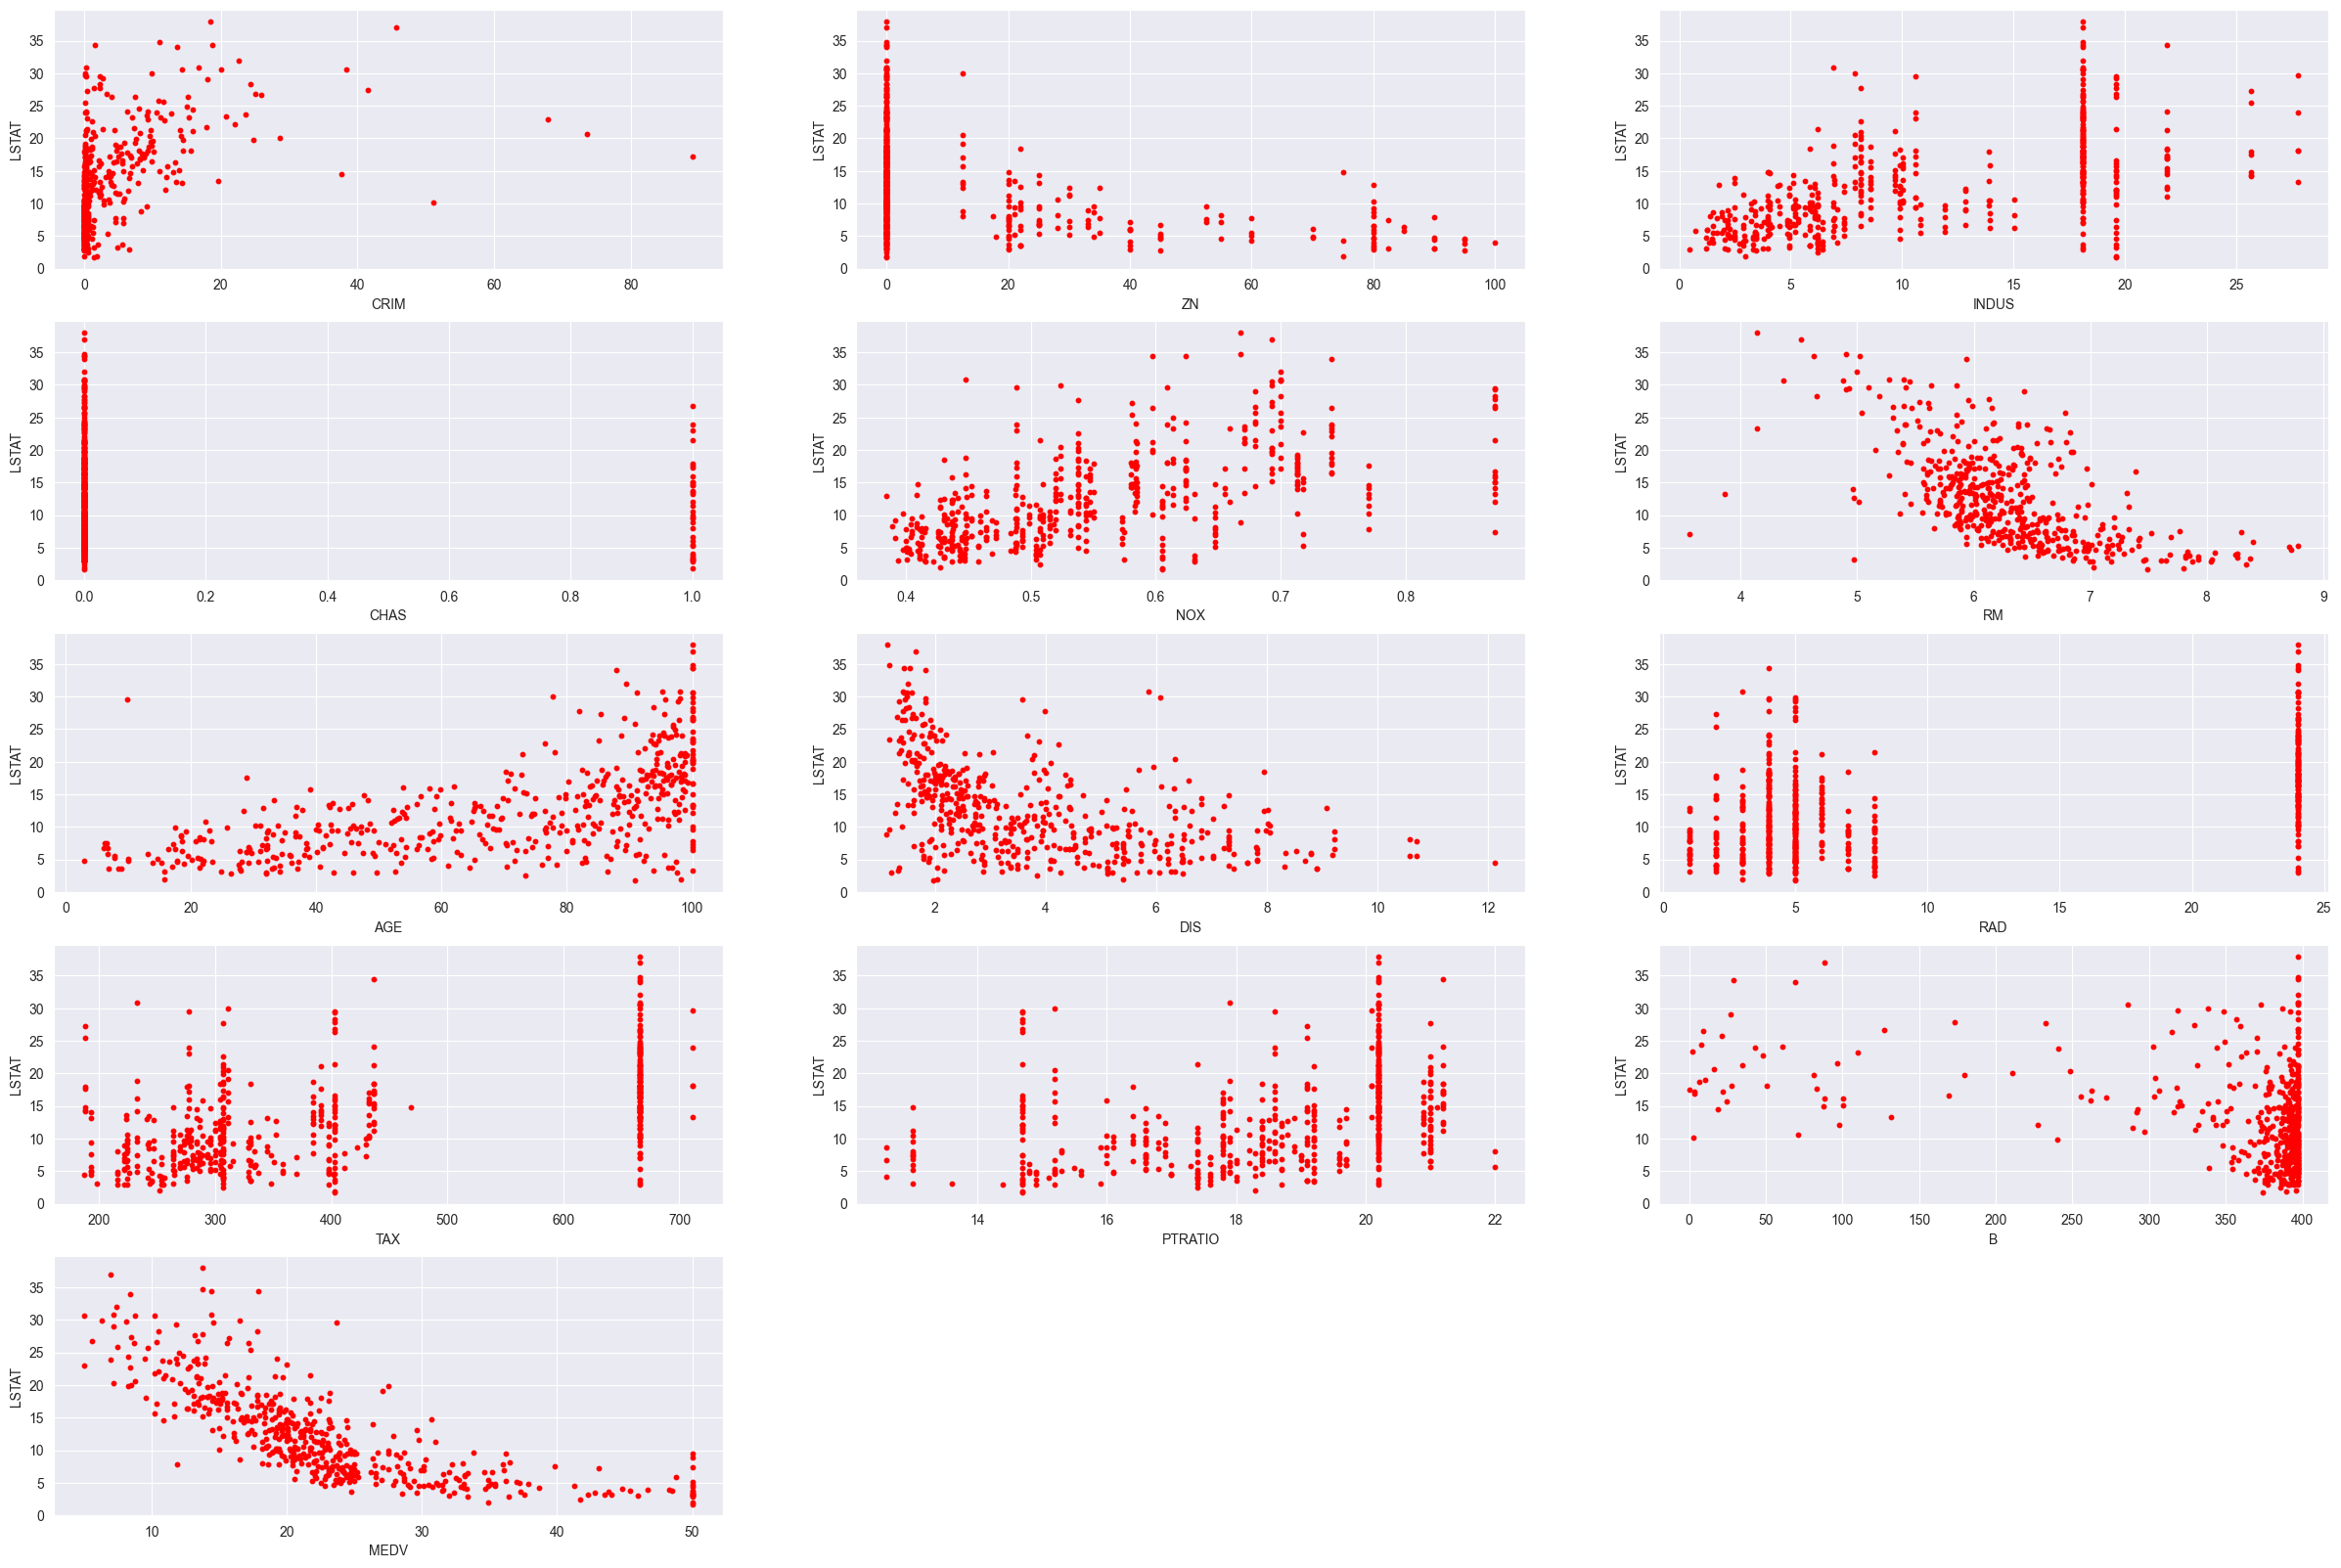

In [85]:
from math import ceil
plt.figure(figsize=(30,20))
x_axis_list = [a for a in df.columns if a!='LSTAT']
y_axis = df['LSTAT']

for index, column in enumerate(x_axis_list):
    row = ceil(len(x_axis_list)/3)
    plt.subplot(row, 3, index+1)
    x_axis = df[column]
    plt.scatter(x_axis, y_axis, color='r', s=10)
    plt.xlabel(column)
    plt.ylabel("LSTAT")
plt.show()


In [86]:
# Again, we clearly see a trend here. Points are not too dispersed and has an upward trend. LSTAT seems to be positively linearly correlated with AGE.
# So all in all, AGE actually seems to influence (negatively) the median value. We could already observe this result on the graph of MEDV / AGE. Varying AGE cascades down (or back-propagates) to make MEDV varies.

#### Step to perform another round of data cleaning and model to predict MEDV

### A linear regression

In [99]:
# importing libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [100]:
# MEDV = The MEDV column or the price of the houses or dependent column also known as y value
# x = columns : 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' , rows: 506
x = df.iloc[:,:-1]
y = df.MEDV

In [101]:
# Initialize the linear regression model
reg = linear_model.LinearRegression()

In [102]:
# split the data into 67% training and 33% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [103]:
# Train the model with our training data
l_reg = reg.fit(x_train, y_train)
print(reg.intercept_)

33.3349757556355


In [104]:
# print the coefficient/weight for each feature/column of our model
print(reg.coef_)

[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [105]:
# print the predictions on our test data
y_pred = reg.predict(x_test)
print(y_pred)

[28.53469469 36.6187006  15.63751079 25.5014496  18.7096734  23.16471591
 17.31011035 14.07736367 23.01064388 20.54223482 24.91632351 18.41098052
 -6.52079687 21.83372604 19.14903064 26.0587322  20.30232625  5.74943567
 40.33137811 17.45791446 27.47486665 30.2170757  10.80555625 23.87721728
 17.99492211 16.02608791 23.268288   14.36825207 22.38116971 19.3092068
 22.17284576 25.05925441 25.13780726 18.46730198 16.60405712 17.46564046
 30.71367733 20.05106788 23.9897768  24.94322408 13.97945355 31.64706967
 42.48057206 17.70042814 26.92507869 17.15897719 13.68918087 26.14924245
 20.2782306  29.99003492 21.21260347 34.03649185 15.41837553 25.95781061
 39.13897274 22.96118424 18.80310558 33.07865362 24.74384155 12.83640958
 22.41963398 30.64804979 31.59567111 16.34088197 20.9504304  16.70145875
 20.23215646 26.1437865  31.12160889 11.89762768 20.45432404 27.48356359
 10.89034224 16.77707214 24.02593714  5.44691807 21.35152331 41.27267175
 18.13447647  9.8012101  21.24024342 13.02644969 21.

In [106]:
# Print the actual values
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: MEDV, Length: 167, dtype: float64


In [107]:
# Check teh model performance / accuracy using Mean Squared Error (MSE)
print(np.mean( (y_pred - y_test)**2) )

20.724023437339724


In [108]:
# Check teh model performance / accuracy using Mean Squared Error (MSE) and sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [110]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.15
Mean squared error: 20.72
Root mean squared error: 4.55
